In [43]:
import os
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go

init_notebook_mode(connected=True) #do not miss this line

from gensim import corpora, models, similarities

import warnings
warnings.filterwarnings("ignore")

In [84]:
import pandas as pd
os.chdir('C:\\Users\\Glynis\\Documents\\MSc A U Chicago\\Capstone')
datafile=pd.read_csv('forpython.csv',encoding='latin1')
datafile=datafile[~(datafile['created_at'].str.len() < 30)]
tweets = datafile.assign(Time=pd.to_datetime(datafile.created_at)).drop('id', axis='columns')


In [86]:
#jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000
tweets['Time'] = pd.to_datetime(tweets['Time'], format='%y-%m-%d %H:%M:%S')
tweetsT = tweets['Time']

trace = go.Histogram(
    x=tweetsT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Tweet Activity Over Time',
    height=450,
    width=1200,
    xaxis=dict(
        title='Date'
    ),
    yaxis=dict(
        title='Tweet Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [18]:
corpus=[]
a=[]
for i in range(len(tweets['text'])):
        a=tweets['text'][i]
        corpus.append(a)
        
corpus[0:5]

['This is like when Nintendo advertised Pixels because Donkey Kong was in it ',
 '@Injustice2Go You guys should release the mobile art as wallpapers or something. Pls @NetherRealm @tylerlansdown',
 "@JohnMKX_Ermac Sign the petition NOW - Don't wait. Your vote may make all the difference! #MortalKombat #Chrome #MK ",
 'Tf....is that raiden off mortal kombat? ',
 "Sorry I haven't been drawing much OW stuff as of late, I've just been really hyped cause of Mortal Kombat and the pâ?¦ "]

In [19]:
import gensim
import logging
import tempfile

TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

from gensim import corpora
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "C:\Users\Glynis\AppData\Local\Temp" will be used to save temporary dictionary and corpus.


In [20]:
from nltk.corpus import stopwords
from string import punctuation

# remove common words and tokenize
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

In [21]:
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference
#print(dictionary)

2018-05-24 15:46:42,635 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-24 15:46:42,790 : INFO : built Dictionary(19578 unique tokens: ['advertised', 'donkey', 'kong', 'like', 'nintendo']...) from 8533 documents (total 82025 corpus positions)
2018-05-24 15:46:42,791 : INFO : saving Dictionary object under C:\Users\Glynis\AppData\Local\Temp\elon.dict, separately None
2018-05-24 15:46:42,805 : INFO : saved C:\Users\Glynis\AppData\Local\Temp\elon.dict


In [22]:
print(dictionary.token2id)

{'advertised': 0, 'donkey': 1, 'kong': 2, 'like': 3, 'nintendo': 4, 'pixels': 5, '@injustice2go': 6, '@netherrealm': 7, '@tylerlansdown': 8, 'art': 9, 'guys': 10, 'mobile': 11, 'pls': 12, 'release': 13, 'something.': 14, 'wallpapers': 15, '#chrome': 16, '#mk': 17, '#mortalkombat': 18, '@johnmkx_ermac': 19, 'difference!': 20, 'make': 21, 'may': 22, 'petition': 23, 'sign': 24, 'vote': 25, 'wait.': 26, 'kombat?': 27, 'mortal': 28, 'raiden': 29, 'tf....is': 30, 'cause': 31, 'drawing': 32, 'hyped': 33, "i've": 34, 'kombat': 35, 'late,': 36, 'much': 37, 'ow': 38, 'pâ?¦': 39, 'really': 40, 'sorry': 41, 'stuff': 42, '11': 43, '@noobde': 44, '@rolltheroyce': 45, '@skarletformk11': 46, 'characters': 47, 'favorite': 48, 'mk': 49, 'return': 50, 'see': 51, 'skarlet': 52, '2019': 53, '@youtube': 54, 'added': 55, 'movie': 56, 'playlist': 57, 'video': 58, ':(((': 59, 'canâ??t': 60, 'charger': 61, 'cry': 62, 'find': 63, 'gonna': 64, 'got': 65, 'iâ??m': 66, 'new': 67, 'ps': 68, 'vita': 69, '#injustice2!

In [23]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)  # store to disk, for later use

2018-05-24 15:47:07,720 : INFO : storing corpus in Matrix Market format to C:\Users\Glynis\AppData\Local\Temp\elon.mm
2018-05-24 15:47:07,722 : INFO : saving sparse matrix to C:\Users\Glynis\AppData\Local\Temp\elon.mm
2018-05-24 15:47:07,723 : INFO : PROGRESS: saving document #0
2018-05-24 15:47:07,746 : INFO : PROGRESS: saving document #1000
2018-05-24 15:47:07,765 : INFO : PROGRESS: saving document #2000
2018-05-24 15:47:07,786 : INFO : PROGRESS: saving document #3000
2018-05-24 15:47:07,808 : INFO : PROGRESS: saving document #4000
2018-05-24 15:47:07,826 : INFO : PROGRESS: saving document #5000
2018-05-24 15:47:07,847 : INFO : PROGRESS: saving document #6000
2018-05-24 15:47:07,869 : INFO : PROGRESS: saving document #7000
2018-05-24 15:47:07,888 : INFO : PROGRESS: saving document #8000
2018-05-24 15:47:07,901 : INFO : saved 8533x19578 matrix, density=0.049% (81030/167059074)
2018-05-24 15:47:07,908 : INFO : saving MmCorpus index to C:\Users\Glynis\AppData\Local\Temp\elon.mm.index


In [24]:
from gensim import corpora, models, similarities

In [25]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

2018-05-24 15:47:24,993 : INFO : collecting document frequencies
2018-05-24 15:47:24,995 : INFO : PROGRESS: processing document #0
2018-05-24 15:47:25,025 : INFO : calculating IDF weights for 8533 documents and 19577 features (81030 matrix non-zeros)


In [26]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

In [27]:
total_topics = 5
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

2018-05-24 15:48:04,789 : INFO : using symmetric alpha at 0.2
2018-05-24 15:48:04,790 : INFO : using symmetric eta at 0.2
2018-05-24 15:48:04,796 : INFO : using serial LDA version on this node
2018-05-24 15:48:04,816 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 8533 documents, updating model once every 2000 documents, evaluating perplexity every 8533 documents, iterating 50x with a convergence threshold of 0.001000
2018-05-24 15:48:04,817 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2018-05-24 15:48:04,819 : INFO : PROGRESS: pass 0, at document #2000/8533
2018-05-24 15:48:05,810 : INFO : merging changes from 2000 documents into a model of 8533 documents
2018-05-24 15:48:05,828 : INFO : topic #0 (0.200): 0.029*"new" + 0.029*"epic" + 0.028*"mk" + 0.027*"coming!" + 0.027*"sf" + 0.027*"franchise." + 0.027*"miss" + 0.027*"v" + 0.026*"#youwontknowuntil

In [28]:
#Show first n important word in the topics:
lda.show_topics(total_topics,5)

[(0,
  '0.018*"mortal" + 0.012*"kombat" + 0.008*"@netherrealm" + 0.005*"new" + 0.005*"#mortalkombat"'),
 (1,
  '0.052*"mortal" + 0.046*"kombat" + 0.011*"like" + 0.008*"fighter" + 0.008*"street"'),
 (2,
  '0.031*"mortal" + 0.025*"kombat" + 0.020*"#injustice2" + 0.015*"@netherrealm" + 0.008*"@noobde"'),
 (3, '0.056*"new" + 0.054*"mk" + 0.053*"epic" + 0.051*"sf" + 0.051*"miss"'),
 (4,
  '0.075*"mortal" + 0.072*"kombat" + 0.009*"x" + 0.009*"@youtube" + 0.008*"2"')]

In [29]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
#data_lda

In [30]:
import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(83, 5)
(5, 83)


In [31]:
df_lda

,#chrome,#injustice,#injustice2,#mk,#mortalkombat,#tmnt,#youwontknowuntilyouplay,&amp;,2,3,...,version,via,video,vote,wait.,without,world,worst,would,x
0,0.000000,0.00000,0.000000,0.000000,0.004965,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003656,0.000000,0.000000,0.000000,0.000000,0.003456,0.000000,0.004276,0.000000,0.000000
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003033,0.003135,...,0.000000,0.000000,0.003434,0.000000,0.000000,0.000000,0.000000,0.000000,0.003018,0.000000
2,0.000000,0.00000,0.019590,0.000000,0.004253,0.003185,0.000000,0.003308,0.000000,0.000000,...,0.000000,0.000000,0.004134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.002129,0.00191,0.001835,0.002506,0.003223,0.000000,0.049656,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.002291,0.002153,0.000000,0.001841,0.000000,0.000000,0.000000
4,0.000000,0.00000,0.003593,0.000000,0.004388,0.000000,0.000000,0.000000,0.008346,0.000000,...,0.000000,0.006188,0.007514,0.000000,0.000000,0.000000,0.000000,0.000000,0.003439,0.008986


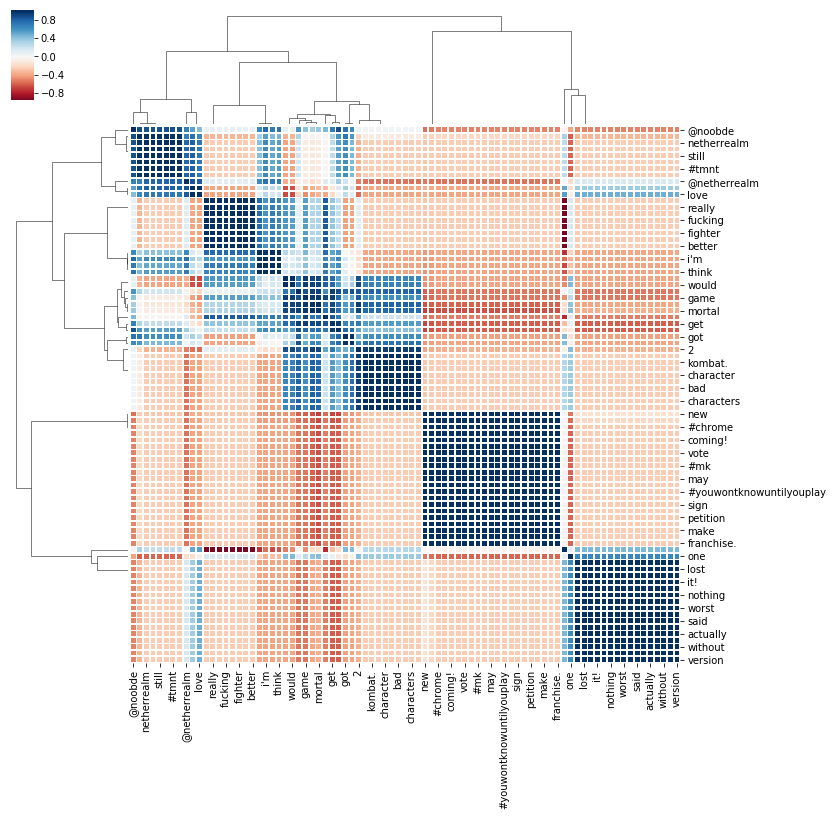

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [34]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

C:\Users\Glynis\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
2      35.261189        1       1   89.995560   51.819424
4      26.419137        1       2  183.530518  -75.482666
1      18.259837        1       3  -23.201651 -129.359421
0      10.030888        1       4  -71.104652   21.654766
3      10.028949        1       5  106.595245 -220.203552, topic_info=     Category        Freq                      Term       Total  loglift  \
term                                                                       
67    Default   62.000000                       new   62.000000  30.0000   
49    Default   53.000000                        mk   53.000000  29.0000   
104   Default   49.000000                      epic   49.000000  28.0000   
107   Default   48.000000                        sf   48.000000  27.0000   
106   Default   48.000000                      miss   48.000000  26.0000   
108   Default   47.000000                         v   47.000000  25.0000   
105   Default   47.000000                franchise.   47.000000  24.0000   
101   Default   46.000000  #youwontknowuntilyouplay   46.000000  23.0000   
103   Default   46.000000                   coming!   46.000000  22.0000   
35    Default  320.000000                    kombat  320.000000  21.0000   
28    Default  361.000000                    mortal  361.000000  20.0000   
89    Default   69.000000               #injustice2   69.000000  19.0000   
7     Default   69.000000              @netherrealm   69.000000  18.0000   
142   Default   16.000000                   fighter   16.000000  17.0000   
143   Default   15.000000                    street   15.000000  16.0000   
139   Default   23.000000            @injusticegame   23.000000  15.0000   
113   Default   26.000000                         x   26.000000  14.0000   
3     Default   44.000000                      like   44.000000  13.0000   
311   Default   15.000000                       via   15.000000  12.0000   
548   Default   40.000000                      game   40.000000  11.0000   
334   Default   18.000000                       one   18.000000  10.0000   
54    Default   31.000000                  @youtube   31.000000   9.0000   
979   Default   12.000000                  fighting   12.000000   8.0000   
342   Default    3.000000                     worst    3.000000   7.0000   
1641  Default    7.000000                   edition    7.000000   6.0000   
264   Default   31.000000                         2   31.000000   5.0000   
242   Default   12.000000                   kombat,   12.000000   4.0000   
341   Default    3.000000                   version    3.000000   3.0000   
475   Default    3.000000                   without    3.000000   2.0000   
508   Default   10.000000                     #tmnt   10.000000   1.0000   
...       ...         ...                       ...         ...      ...   
5694   Topic5    1.116412                    listen    1.206042   2.2225   
101    Topic5   42.493835  #youwontknowuntilyouplay   46.053482   2.2193   
6074   Topic5    0.904863                      idea    0.981077   2.2188   
1833   Topic5    1.032636                     well.    1.119677   2.2188   
103    Topic5   42.433541                   coming!   46.073542   2.2174   
5692   Topic5    0.905000                       #np    0.983096   2.2169   
105    Topic5   43.232394                franchise.   47.114039   2.2137   
107    Topic5   43.999699                        sf   48.028143   2.2121   
106    Topic5   43.923245                      miss   48.067715   2.2095   
108    Topic5   43.230226                         v   47.317994   2.2093   
3086   Topic5    0.964064                 kombat...    1.057180   2.2075   
1232   Topic5    0.791661                      face    0.869931   2.2054   
5515   Topic5    0.959696                      gore    1.054653   2.2053   
6006   Topic5    0.774312                      sexy    